# Does production budget have any affect 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tb_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
tb_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
tb_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [4]:
tb_df.drop(['original_title'], axis = 1, inplace = True)

In [5]:
tb_df.drop(['runtime_minutes'], axis = 1, inplace = True)

In [6]:
tb_df.isna().sum() / len(tb_df)

tconst           0.000000
primary_title    0.000000
start_year       0.000000
genres           0.037005
dtype: float64

In [7]:
budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [9]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
def convert_col_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df
    

In [11]:
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_movies_df.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_convert:
    budgets_df = convert_col_to_int(budgets_df, col)

In [13]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [14]:
budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [15]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [16]:
for col in budgets_df:
    print(f"currently checking values from col: {col}")
    print(f"top 5 values: \n {budgets_df[col].value_counts(normalize = True)[:5]}")
    print('--------------------')

currently checking values from col: id
top 5 values: 
 4     0.010031
53    0.010031
61    0.010031
65    0.010031
69    0.010031
Name: id, dtype: float64
--------------------
currently checking values from col: release_date
top 5 values: 
 Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2013    0.002248
Name: release_date, dtype: float64
--------------------
currently checking values from col: movie
top 5 values: 
 Home                    0.000519
Halloween               0.000519
King Kong               0.000519
Beauty and the Beast    0.000346
Ben-Hur                 0.000346
Name: movie, dtype: float64
--------------------
currently checking values from col: production_budget
top 5 values: 
 20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
Name: production_budget, dtype: float64
--------------------
currently checking values from col: domestic_gross
top 5 values: 
 0  

In [17]:
budgets_df['difference'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [18]:
budgets_df.sort_values(by = 'difference', ascending= False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


In [19]:
top_budgets = budgets_df.sort_values(by = 'difference', ascending = False).head(10)

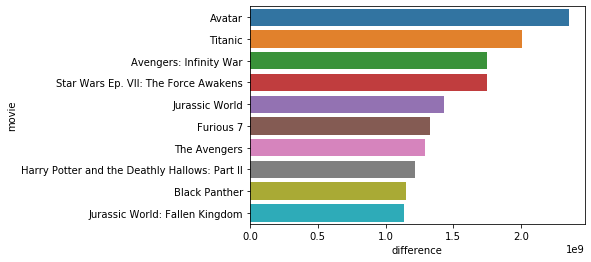

In [20]:
sns.barplot(x = 'difference', y = 'movie', data = top_budgets)


# cleaning title basics df

In [21]:
tmdb_movies_df.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [22]:
dup = tmdb_movies_df[tmdb_movies_df.duplicated()]
print(len(dup))

1020


In [23]:
tmdb_movies_df = tmdb_movies_df.drop_duplicates()

In [24]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            25497 non-null object
id                   25497 non-null int64
original_language    25497 non-null object
original_title       25497 non-null object
popularity           25497 non-null float64
release_date         25497 non-null object
title                25497 non-null object
vote_average         25497 non-null float64
vote_count           25497 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [25]:
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [26]:
tmdb_movies_df['release_date']

0        2010-11-19
1        2010-03-26
2        2010-05-07
3        1995-11-22
4        2010-07-16
            ...    
26512    2018-10-13
26513    2018-05-01
26514    2018-10-01
26515    2018-06-22
26516    2018-10-05
Name: release_date, Length: 25497, dtype: object

In [27]:
tb_df.head()

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [28]:
tb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
tconst           146144 non-null object
primary_title    146144 non-null object
start_year       146144 non-null int64
genres           140736 non-null object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


## merging budgets df with the title basics df

In [29]:
movie_details_df = pd.merge(budgets_df, tb_df, left_on = ['movie'],
                        right_on = ['primary_title'], how = 'left')

In [30]:
movie_details_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,tconst,primary_title,start_year,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Avatar,2011.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Dark Phoenix,2019.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Avengers: Age of Ultron,2015.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,NaN,NaN,NaN,NaN


In [31]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 11 columns):
id                   7221 non-null int64
release_date         7221 non-null object
movie                7221 non-null object
production_budget    7221 non-null int64
domestic_gross       7221 non-null int64
worldwide_gross      7221 non-null int64
difference           7221 non-null int64
tconst               3815 non-null object
primary_title        3815 non-null object
start_year           3815 non-null float64
genres               3743 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 677.0+ KB


In [32]:
movie_details_df.isna().sum() 

id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
difference              0
tconst               3406
primary_title        3406
start_year           3406
genres               3478
dtype: int64

In [33]:
movie_details_df.dropna(inplace = True)

In [34]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 7219
Data columns (total 11 columns):
id                   3743 non-null int64
release_date         3743 non-null object
movie                3743 non-null object
production_budget    3743 non-null int64
domestic_gross       3743 non-null int64
worldwide_gross      3743 non-null int64
difference           3743 non-null int64
tconst               3743 non-null object
primary_title        3743 non-null object
start_year           3743 non-null float64
genres               3743 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 350.9+ KB


## splitting up the genres to where each movie only has on genre catagory

In [35]:
movie_details_df.genres

0                         Horror
1       Action,Adventure,Fantasy
2        Action,Adventure,Sci-Fi
3        Action,Adventure,Sci-Fi
6        Action,Adventure,Sci-Fi
                  ...           
7204         Comedy,Drama,Horror
7205                       Drama
7211                Comedy,Drama
7216      Horror,Sci-Fi,Thriller
7219       Drama,Horror,Thriller
Name: genres, Length: 3743, dtype: object

In [36]:
movie_details_df['genres_split'] = movie_details_df['genres'].map(lambda x: x.split(",") if x else x)

In [37]:
movie_details_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,tconst,primary_title,start_year,genres,genres_split
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Avatar,2011.0,Horror,[Horror]
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Dark Phoenix,2019.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Avengers: Age of Ultron,2015.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,2018.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"


In [38]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 7219
Data columns (total 12 columns):
id                   3743 non-null int64
release_date         3743 non-null object
movie                3743 non-null object
production_budget    3743 non-null int64
domestic_gross       3743 non-null int64
worldwide_gross      3743 non-null int64
difference           3743 non-null int64
tconst               3743 non-null object
primary_title        3743 non-null object
start_year           3743 non-null float64
genres               3743 non-null object
genres_split         3743 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 380.1+ KB


In [39]:
all_genres = set()
for genre in movie_details_df['genres_split']:
    if genre:
        all_genres.update(genre)
    

In [40]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [41]:
type(movie_details_df['genres_split'][0])


list

In [42]:
movie_details_df['genre1'] = movie_details_df['genres_split'].map(lambda x: x[0])

In [43]:
movie_details_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,tconst,primary_title,start_year,genres,genres_split,genre1
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Avatar,2011.0,Horror,[Horror],Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",Action
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Dark Phoenix,2019.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Avengers: Age of Ultron,2015.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,2018.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action


In [44]:
y = 'NA'

In [45]:
movie_details_df['genres2'] = movie_details_df['genres_split'].map(lambda x: y if len(x) < 2 else x[1])

In [46]:
movie_details_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,tconst,primary_title,start_year,genres,genres_split,genre1,genres2
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Avatar,2011.0,Horror,[Horror],Horror,NA
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",Action,Adventure
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Dark Phoenix,2019.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Avengers: Age of Ultron,2015.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,2018.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure


In [47]:
movie_details_df['genres3'] = movie_details_df['genres_split'].map(lambda x: y if len(x) < 3 else x[2])

In [48]:
movie_details_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,tconst,primary_title,start_year,genres,genres_split,genre1,genres2,genres3
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Avatar,2011.0,Horror,[Horror],Horror,NA,NA
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",Action,Adventure,Fantasy
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Dark Phoenix,2019.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Avengers: Age of Ultron,2015.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,2018.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi


In [49]:
movie_details_df.drop(columns = ['genres', 'genres_split'], inplace = True)

In [50]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 7219
Data columns (total 13 columns):
id                   3743 non-null int64
release_date         3743 non-null object
movie                3743 non-null object
production_budget    3743 non-null int64
domestic_gross       3743 non-null int64
worldwide_gross      3743 non-null int64
difference           3743 non-null int64
tconst               3743 non-null object
primary_title        3743 non-null object
start_year           3743 non-null float64
genre1               3743 non-null object
genres2              3743 non-null object
genres3              3743 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 569.4+ KB


In [51]:
movie_details_df.drop(columns = ['primary_title', 'start_year'], inplace = True)

In [52]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 7219
Data columns (total 11 columns):
id                   3743 non-null int64
release_date         3743 non-null object
movie                3743 non-null object
production_budget    3743 non-null int64
domestic_gross       3743 non-null int64
worldwide_gross      3743 non-null int64
difference           3743 non-null int64
tconst               3743 non-null object
genre1               3743 non-null object
genres2              3743 non-null object
genres3              3743 non-null object
dtypes: int64(5), object(6)
memory usage: 510.9+ KB


In [53]:
movie_details_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,tconst,genre1,genres2,genres3
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Horror,NA,NA
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Action,Adventure,Fantasy
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Action,Adventure,Sci-Fi
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Action,Adventure,Sci-Fi
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Action,Adventure,Sci-Fi


In [54]:
movie_details_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
difference           0
tconst               0
genre1               0
genres2              0
genres3              0
dtype: int64

In [55]:
for col in movie_details_df:
    print(f"currently checking values from col: {col}")
    print(f"top 5 values: \n {movie_details_df[col].value_counts(normalize = True)[:5]}")
    print('--------------------')

currently checking values from col: id
top 5 values: 
 43    0.018167
69    0.016564
44    0.016297
56    0.015763
63    0.015763
Name: id, dtype: float64
--------------------
currently checking values from col: release_date
top 5 values: 
 Mar 27, 2015    0.007213
Apr 23, 2009    0.006412
Jun 5, 2009     0.006412
Feb 6, 2004     0.006412
Dec 31, 2014    0.006145
Name: release_date, dtype: float64
--------------------
currently checking values from col: movie
top 5 values: 
 Home          0.019236
Brothers      0.006946
The Gift      0.006946
The Return    0.005076
Hamlet        0.004275
Name: movie, dtype: float64
--------------------
currently checking values from col: production_budget
top 5 values: 
 10000000    0.035800
20000000    0.035533
5000000     0.033129
15000000    0.031793
25000000    0.030724
Name: production_budget, dtype: float64
--------------------
currently checking values from col: domestic_gross
top 5 values: 
 0            0.141330
15433        0.006412
177397510

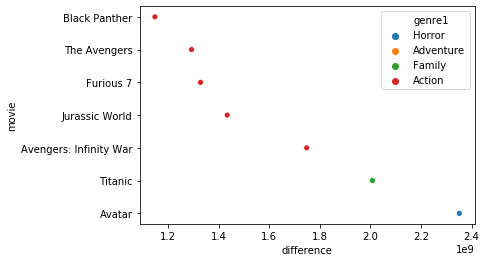

In [56]:
sns.scatterplot(x = 'difference', y = 'movie', hue = 'genre1', 
               data = movie_details_df.sort_values(by = 'difference', ascending = False)[:8])

In [57]:
movie_genre = movie_details_df.groupby(by =['genre1']).sum()

In [58]:
movie_genre.reset_index(inplace = True).head()

AttributeError: 'NoneType' object has no attribute 'head'

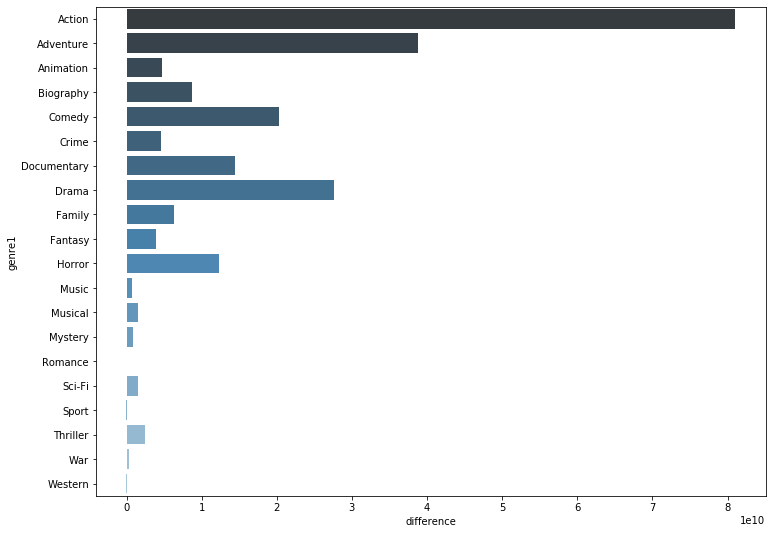

In [59]:
plt.figure(figsize = (12,9))
sns.barplot(x = 'difference', y = 'genre1', data = movie_genre, palette = 'Blues_d')

In [60]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 7219
Data columns (total 11 columns):
id                   3743 non-null int64
release_date         3743 non-null object
movie                3743 non-null object
production_budget    3743 non-null int64
domestic_gross       3743 non-null int64
worldwide_gross      3743 non-null int64
difference           3743 non-null int64
tconst               3743 non-null object
genre1               3743 non-null object
genres2              3743 non-null object
genres3              3743 non-null object
dtypes: int64(5), object(6)
memory usage: 510.9+ KB


In [61]:
df2 = movie_details_df.groupby(by = ['genre1'])

In [62]:
movie_details_df['roi'] = (movie_details_df['difference'] / movie_details_df['production_budget']) * 100

In [63]:
movie_details_df.roi.head()

0    553.257713
1    154.667286
2    -57.210757
3    324.384139
6    582.711400
Name: roi, dtype: float64

In [64]:
movie_details_df['roi'] = movie_details_df['roi'].round()

In [65]:
movie_details_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,tconst,genre1,genres2,genres3,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Horror,NA,NA,553.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Action,Adventure,Fantasy,155.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Action,Adventure,Sci-Fi,-57.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Action,Adventure,Sci-Fi,324.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Action,Adventure,Sci-Fi,583.0


In [66]:
df2 = movie_details_df.groupby('genre1').mean()

In [67]:
df2.head()

,id,production_budget,domestic_gross,worldwide_gross,difference,roi
genre1,,,,,,
Action,49.763380,6.211357e+07,6.630385e+07,1.761956e+08,1.140820e+08,239.263380
Adventure,49.036290,6.364687e+07,8.078297e+07,2.199213e+08,1.562744e+08,218.310484
Animation,51.525000,4.088416e+07,7.006541e+07,1.578445e+08,1.169603e+08,912.000000
Biography,51.060748,2.441538e+07,3.284917e+07,6.527619e+07,4.086081e+07,447.565421
Comedy,53.144366,2.094939e+07,3.082011e+07,5.669706e+07,3.574767e+07,240.176056


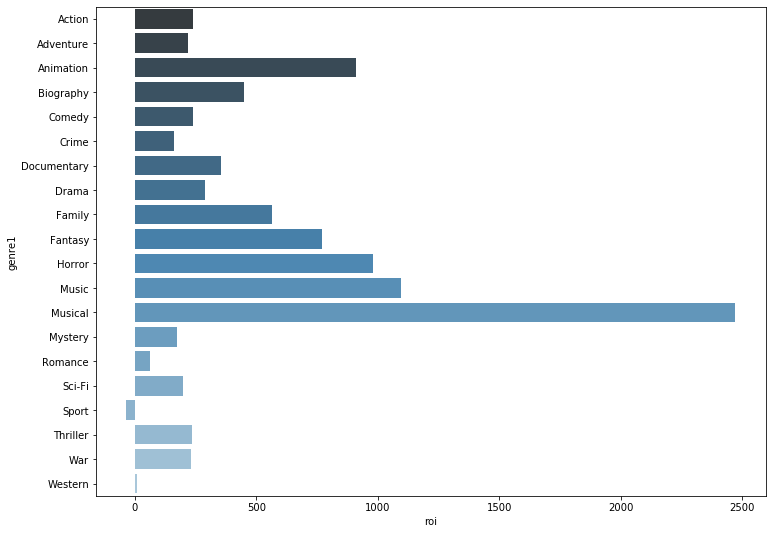

In [68]:
plt.figure(figsize = (12,9))
sns.barplot(x = 'roi', y = 'genre1', data = df2.reset_index(), palette = 'Blues_d')

In [69]:
movie_details_df.reset_index(inplace = True)

In [70]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 13 columns):
index                3743 non-null int64
id                   3743 non-null int64
release_date         3743 non-null object
movie                3743 non-null object
production_budget    3743 non-null int64
domestic_gross       3743 non-null int64
worldwide_gross      3743 non-null int64
difference           3743 non-null int64
tconst               3743 non-null object
genre1               3743 non-null object
genres2              3743 non-null object
genres3              3743 non-null object
roi                  3743 non-null float64
dtypes: float64(1), int64(6), object(6)
memory usage: 380.3+ KB


## changing release_date column from an object to a datetime so i can group the movies from the last ten years

In [71]:
movie_details_df['release_date'] = pd.to_datetime(movie_details_df['release_date'])

In [72]:
movie_details_df['year'] = movie_details_df['release_date'].dt.year

In [73]:
movie_details_df['year']

0       2009
1       2011
2       2019
3       2015
4       2018
        ... 
3738    2006
3739    2001
3740    2012
3741    2018
3742    2015
Name: year, Length: 3743, dtype: int64

In [74]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 14 columns):
index                3743 non-null int64
id                   3743 non-null int64
release_date         3743 non-null datetime64[ns]
movie                3743 non-null object
production_budget    3743 non-null int64
domestic_gross       3743 non-null int64
worldwide_gross      3743 non-null int64
difference           3743 non-null int64
tconst               3743 non-null object
genre1               3743 non-null object
genres2              3743 non-null object
genres3              3743 non-null object
roi                  3743 non-null float64
year                 3743 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memory usage: 409.5+ KB


## added a release month column

In [120]:
movie_details_df['release_month'] = pd.to_datetime(movie_details_df['release_date'],
                                                     format='%m').dt.month_name().str.slice(stop=3)




In [121]:
movie_details_df.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,tconst,genre1,genres2,genres3,roi,year,release_month,profit
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Horror,NA,NA,553.0,2009,Dec,2351345279
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Action,Adventure,Fantasy,155.0,2011,May,635063875
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Action,Adventure,Sci-Fi,-57.0,2019,Jun,-200237650
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Action,Adventure,Sci-Fi,324.0,2015,May,1072413963
4,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Action,Adventure,Sci-Fi,583.0,2018,Apr,1748134200


## added a profit column

In [122]:
movie_details_df['profit'] = movie_details_df['worldwide_gross'] - movie_details_df['production_budget']

In [123]:
movie_details_df.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,tconst,genre1,genres2,genres3,roi,year,release_month,profit
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Horror,NA,NA,553.0,2009,Dec,2351345279
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Action,Adventure,Fantasy,155.0,2011,May,635063875
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Action,Adventure,Sci-Fi,-57.0,2019,Jun,-200237650
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Action,Adventure,Sci-Fi,324.0,2015,May,1072413963
4,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Action,Adventure,Sci-Fi,583.0,2018,Apr,1748134200


## trying to group the movies from the past ten years

In [124]:
past_ten_years = movie_details_df[movie_details_df['year'] >= 2010]

In [125]:
past_ten_years

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,tconst,genre1,genres2,genres3,roi,year,release_month,profit
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Action,Adventure,Fantasy,155.0,2011,May,635063875
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Action,Adventure,Sci-Fi,-57.0,2019,Jun,-200237650
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Action,Adventure,Sci-Fi,324.0,2015,May,1072413963
4,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Action,Adventure,Sci-Fi,583.0,2018,Apr,1748134200
5,8,9,2017-11-17,Justice League,300000000,229024295,655945209,355945209,tt0974015,Action,Adventure,Fantasy,119.0,2017,Nov,355945209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,7196,59,2011-11-25,The Ridges,17300,0,0,-17300,tt1781935,Drama,Horror,Thriller,-100.0,2011,Nov,-17300
3737,7199,62,2014-12-31,Stories of Our Lives,15000,0,0,-15000,tt3973612,Drama,NA,NA,-100.0,2014,Dec,-15000
3740,7211,73,2012-01-13,Newlyweds,9000,4584,4584,-4416,tt1880418,Comedy,Drama,NA,-49.0,2012,Jan,-4416
3741,7216,78,2018-12-31,Red 11,7000,0,0,-7000,tt7837402,Horror,Sci-Fi,Thriller,-100.0,2018,Dec,-7000


In [132]:
top_genre = past_ten_years.groupby(['genre1'])

In [133]:
past_ten_years

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,tconst,genre1,genres2,genres3,roi,year,release_month,profit
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Action,Adventure,Fantasy,155.0,2011,May,635063875
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Action,Adventure,Sci-Fi,-57.0,2019,Jun,-200237650
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Action,Adventure,Sci-Fi,324.0,2015,May,1072413963
4,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Action,Adventure,Sci-Fi,583.0,2018,Apr,1748134200
5,8,9,2017-11-17,Justice League,300000000,229024295,655945209,355945209,tt0974015,Action,Adventure,Fantasy,119.0,2017,Nov,355945209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,7196,59,2011-11-25,The Ridges,17300,0,0,-17300,tt1781935,Drama,Horror,Thriller,-100.0,2011,Nov,-17300
3737,7199,62,2014-12-31,Stories of Our Lives,15000,0,0,-15000,tt3973612,Drama,NA,NA,-100.0,2014,Dec,-15000
3740,7211,73,2012-01-13,Newlyweds,9000,4584,4584,-4416,tt1880418,Comedy,Drama,NA,-49.0,2012,Jan,-4416
3741,7216,78,2018-12-31,Red 11,7000,0,0,-7000,tt7837402,Horror,Sci-Fi,Thriller,-100.0,2018,Dec,-7000
